In [1]:
import options_risk as e
import numpy as np  

In [11]:
# Option asiatique call
params_asian = {
    'S0': 100,       # Prix initial
    'K': 104,        # Prix d'exercice
    'T': 1.0,        # Temps jusqu'à maturité (1 an)
    'r': 0.01,       # Taux d'intérêt sans risque (5%)
    'sigma': 0.35,   # Volatilité (25%)
    'option_type': 'call',
    'position': 'long',
    'type_option': 'asian',
    'dividend_yield': 0.04  # Taux de dividende (2%)
}

In [12]:
# Créer et exécuter la simulation
sim = e.EuropeanOptionMonteCarlo(**params_asian)  # ou tout autre ensemble de paramètres

In [13]:
results = sim.simulate_option_price(num_simulations=2000, steps=252)

Exécution de 2000 simulations...
  10% terminé...
  20% terminé...
  30% terminé...
  40% terminé...
  50% terminé...
  60% terminé...
  70% terminé...
  80% terminé...
  90% terminé...
Simulations terminées.


In [14]:
# Afficher les résultats pour l'option d'achat
print("\nRésultats de la simulation pour l'option d'achat (Call):")
print(f"Prix estimé de l'option (Monte Carlo): {sim.option_price:.4f}")
print(f"Prix théorique (Black-Scholes): {sim.bs_price:.4f}")
print(f"Erreur standard: {sim.standard_error:.6f}")
print(f"Intervalle de confiance à 95%: [{sim.ci_95_lower:.4f}, {sim.ci_95_upper:.4f}]")


Résultats de la simulation pour l'option d'achat (Call):
Prix estimé de l'option (Monte Carlo): 5.5774
Prix théorique (Black-Scholes): 10.6492
Erreur standard: 0.246979
Intervalle de confiance à 95%: [5.0933, 6.0615]


In [15]:
# Afficher les métriques de risque pour l'option d'achat
print("\nMétriques de risque pour l'option d'achat (Call):")
print(f"VaR à 95%: {sim.var_95:.4f}")
print(f"VaR à 99%: {sim.var_99:.4f}")
print(f"Expected Shortfall à 95%: {sim.es_95:.4f}")
print(f"Expected Shortfall à 99%: {sim.es_99:.4f}")


Métriques de risque pour l'option d'achat (Call):
VaR à 95%: 0.0000
VaR à 99%: 0.0000
Expected Shortfall à 95%: 0.0000
Expected Shortfall à 99%: 0.0000



Affichage de la distribution des prix...


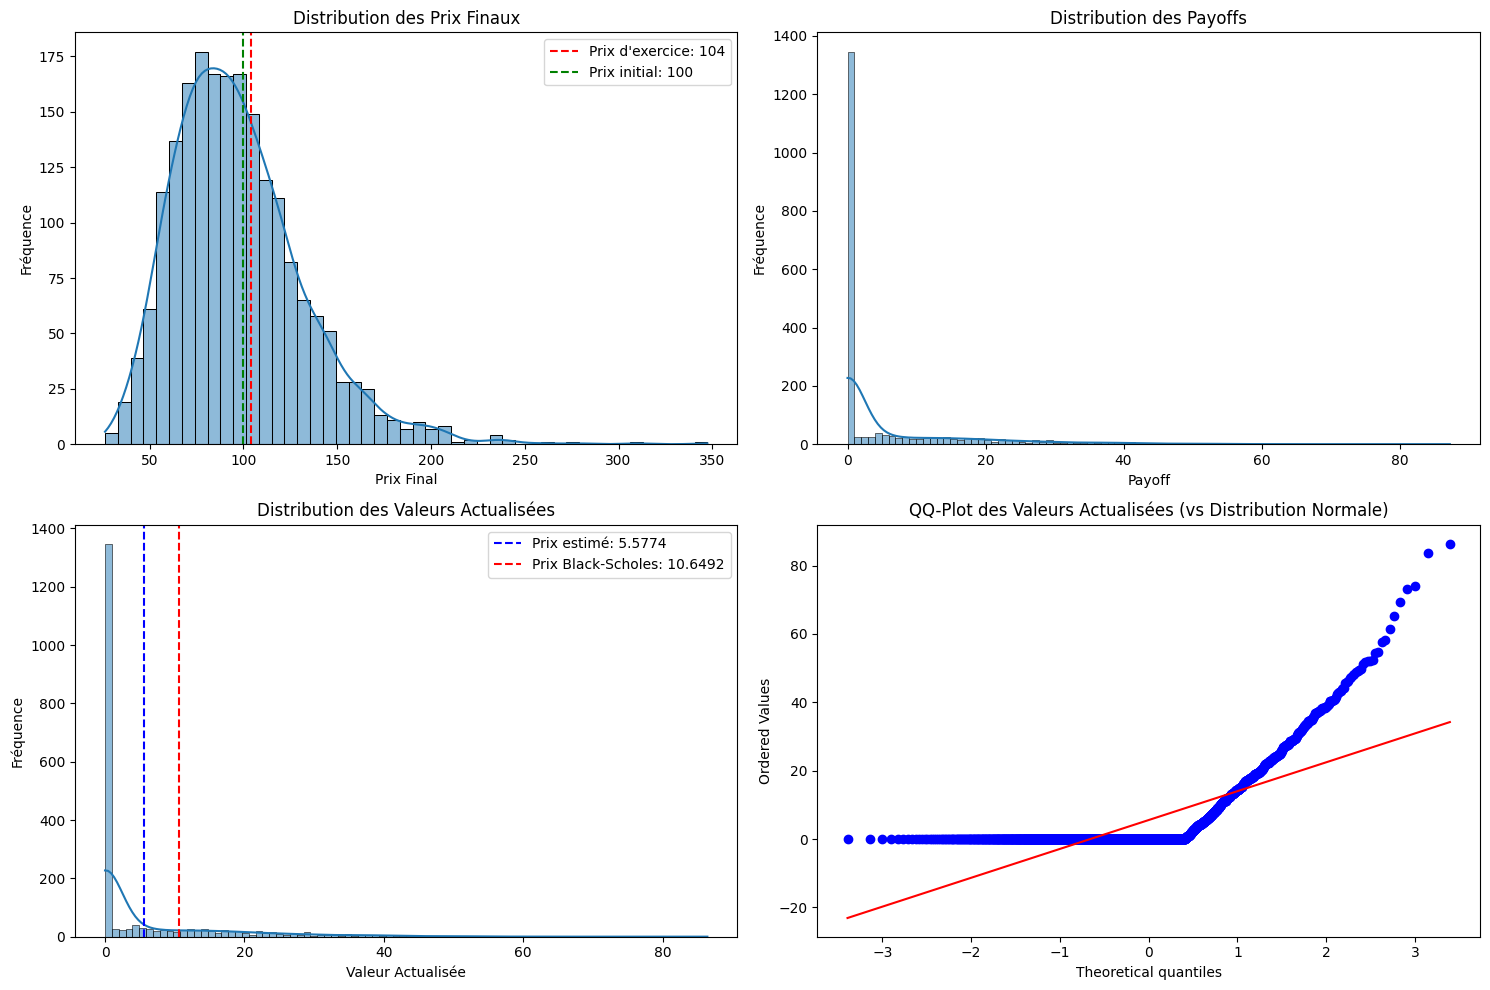

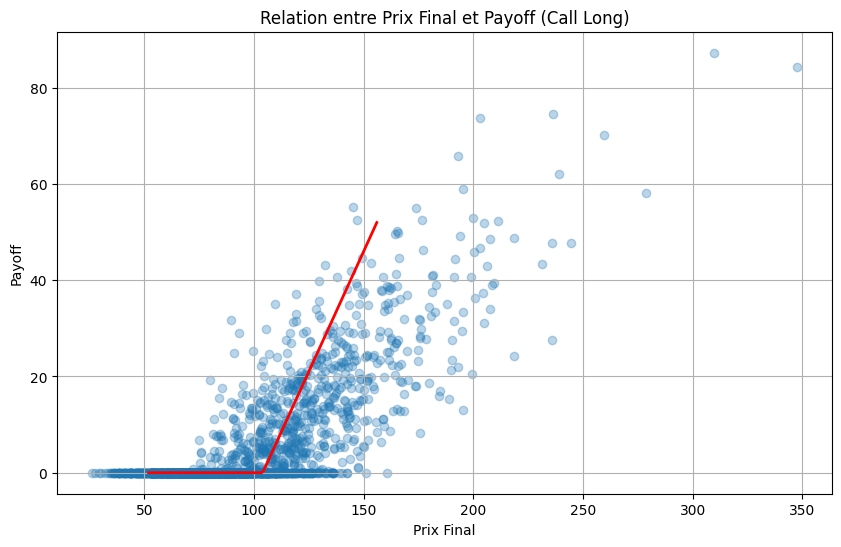

In [16]:
# Visualiser la distribution des prix
print("\nAffichage de la distribution des prix...")
metrics = sim.plot_price_distribution()


Affichage des chemins de prix et de la convergence...


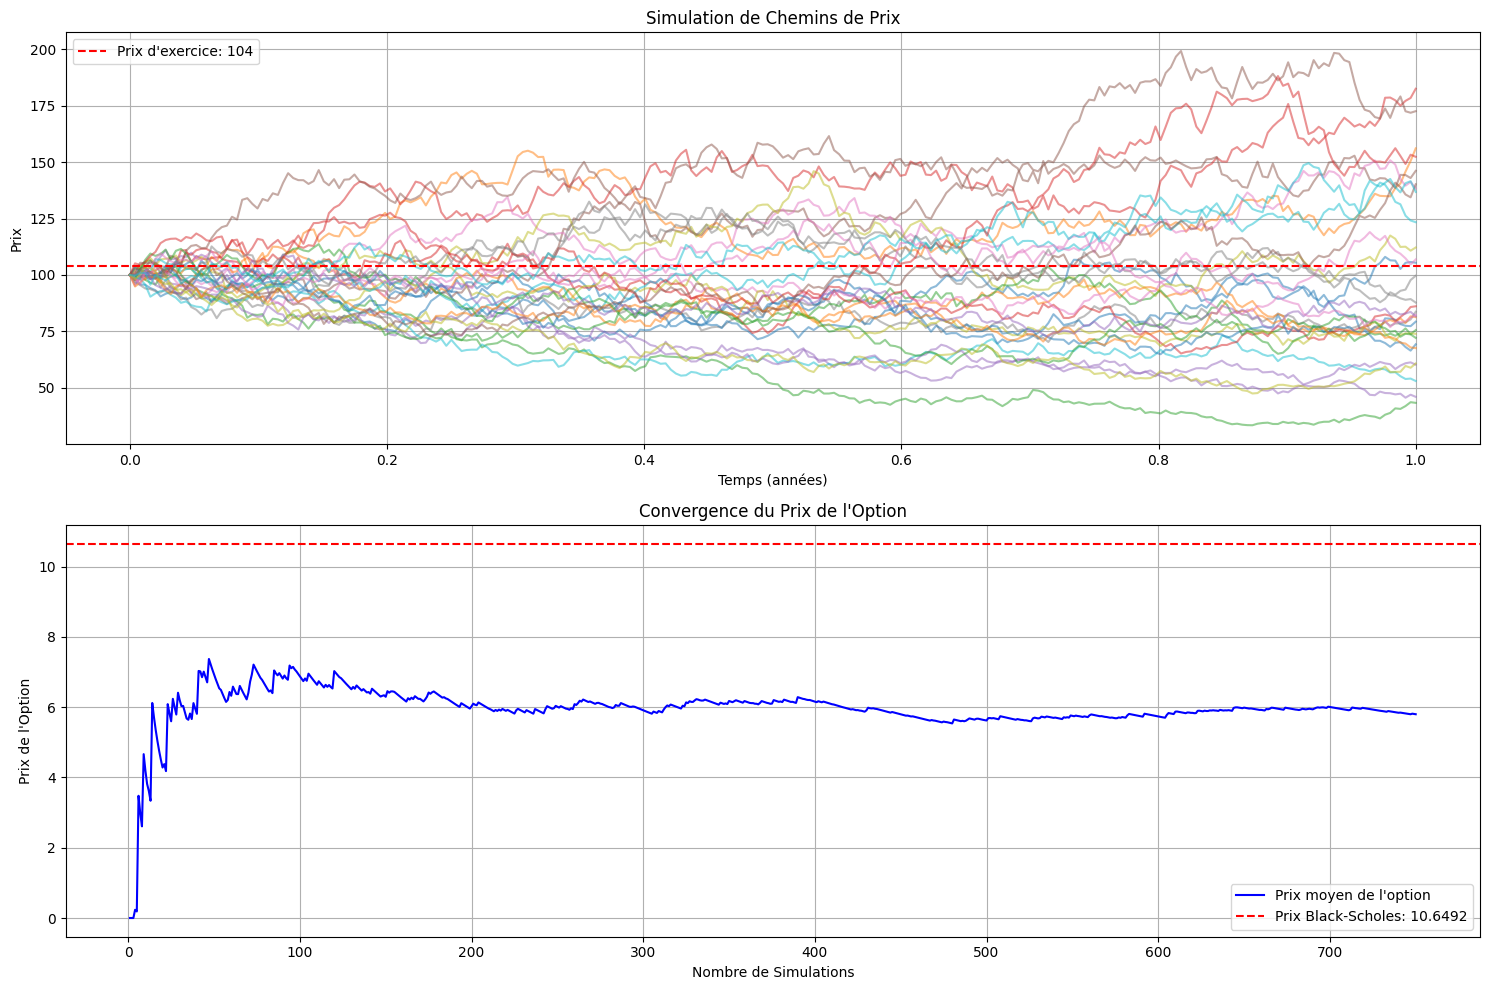

In [17]:
# Visualiser les chemins de prix et la convergence
print("\nAffichage des chemins de prix et de la convergence...")
sim.plot_price_paths(num_paths=30, steps=252)


Affichage de l'évolution de la valeur de l'option au fil du temps...


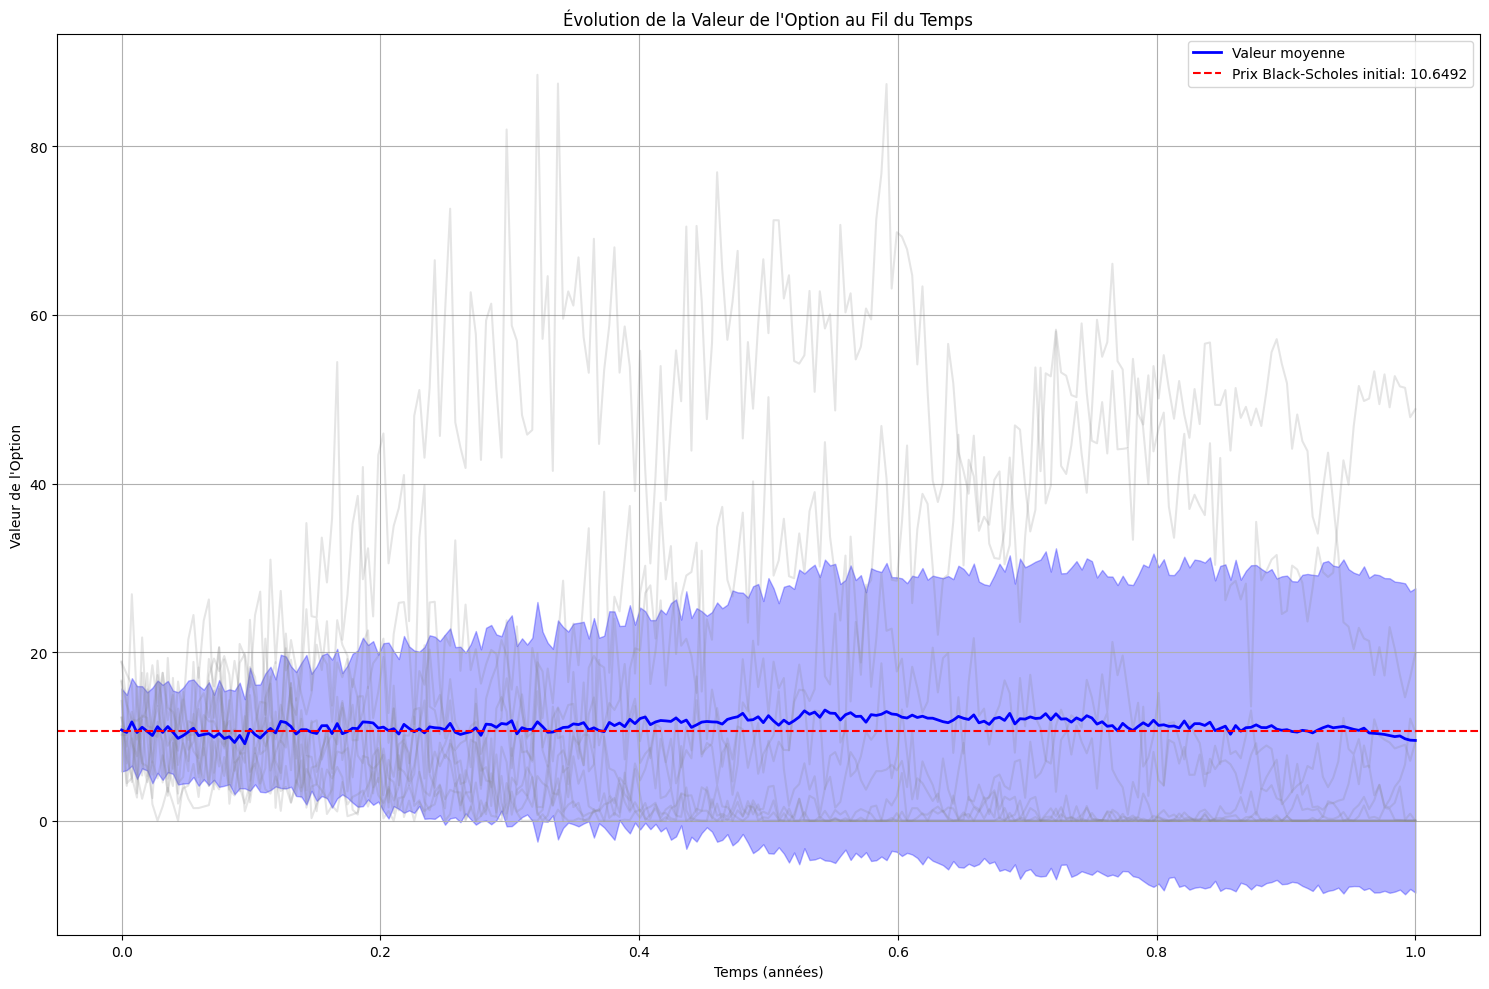

{'mean_values': array([10.76533177, 10.46988019, 11.72459198, 10.46655669, 11.091384  ,
        10.59638851, 10.11061776, 11.15930212, 10.48201111, 11.17416169,
        10.50425454,  9.77169557, 10.10347256, 10.53989234, 10.97490447,
        10.09000302, 10.23637443, 10.33506006,  9.90405813, 10.35582757,
         9.75627573,  9.96223012,  9.28303492, 10.12091853,  9.12997396,
        10.85081704, 10.222929  ,  9.80036937, 10.42017887, 10.94984654,
        10.41894104, 11.78846196, 11.6553546 , 11.17268553, 10.29031702,
        10.79633558, 10.79311309, 10.49632515, 10.34449399, 11.27203236,
        11.28011924, 10.33820711, 11.52667831, 10.32327323, 10.57157435,
        10.97579857, 10.92284788, 11.72256674, 11.68529587, 11.5978407 ,
        10.98941226, 11.10798735, 10.69635087, 10.91777874, 10.28677556,
        11.43068407, 10.95477724, 10.56153915, 10.89956657, 10.42226445,
        11.13539237, 11.0338782 , 10.9868637 , 10.80583573, 11.55099279,
        10.49309222, 10.23379555, 10

In [18]:
# Visualiser l'évolution de la valeur de l'option au fil du temps
print("\nAffichage de l'évolution de la valeur de l'option au fil du temps...")
sim.plot_option_value_over_time(num_paths=100, steps=252)


Démonstration du comportement de l'option à l'approche de l'échéance...


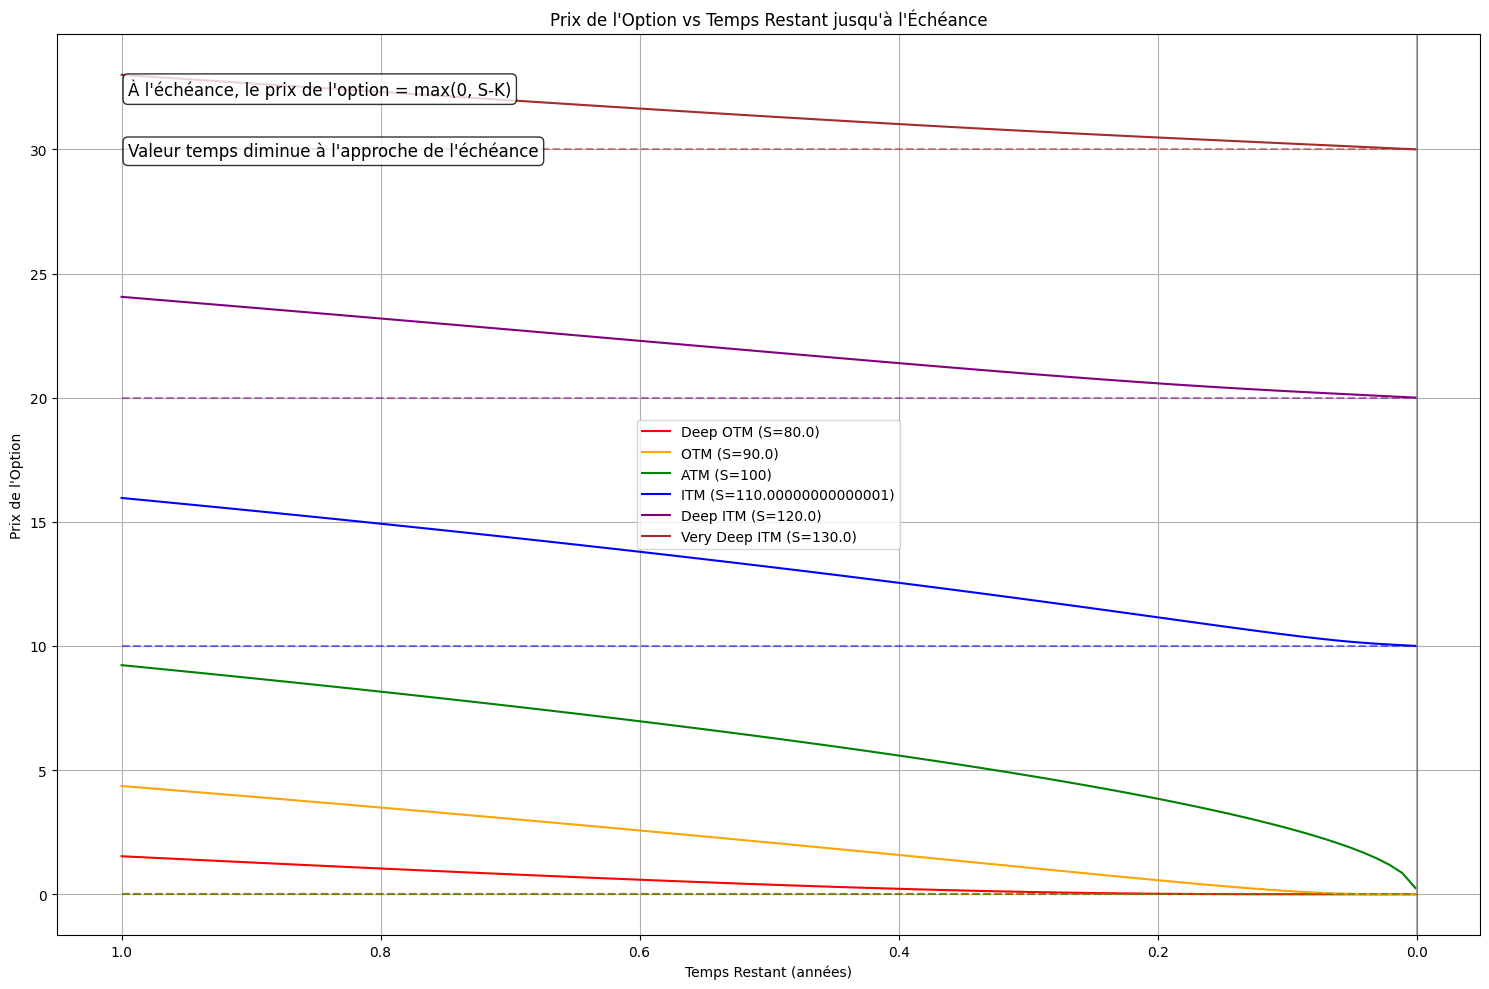

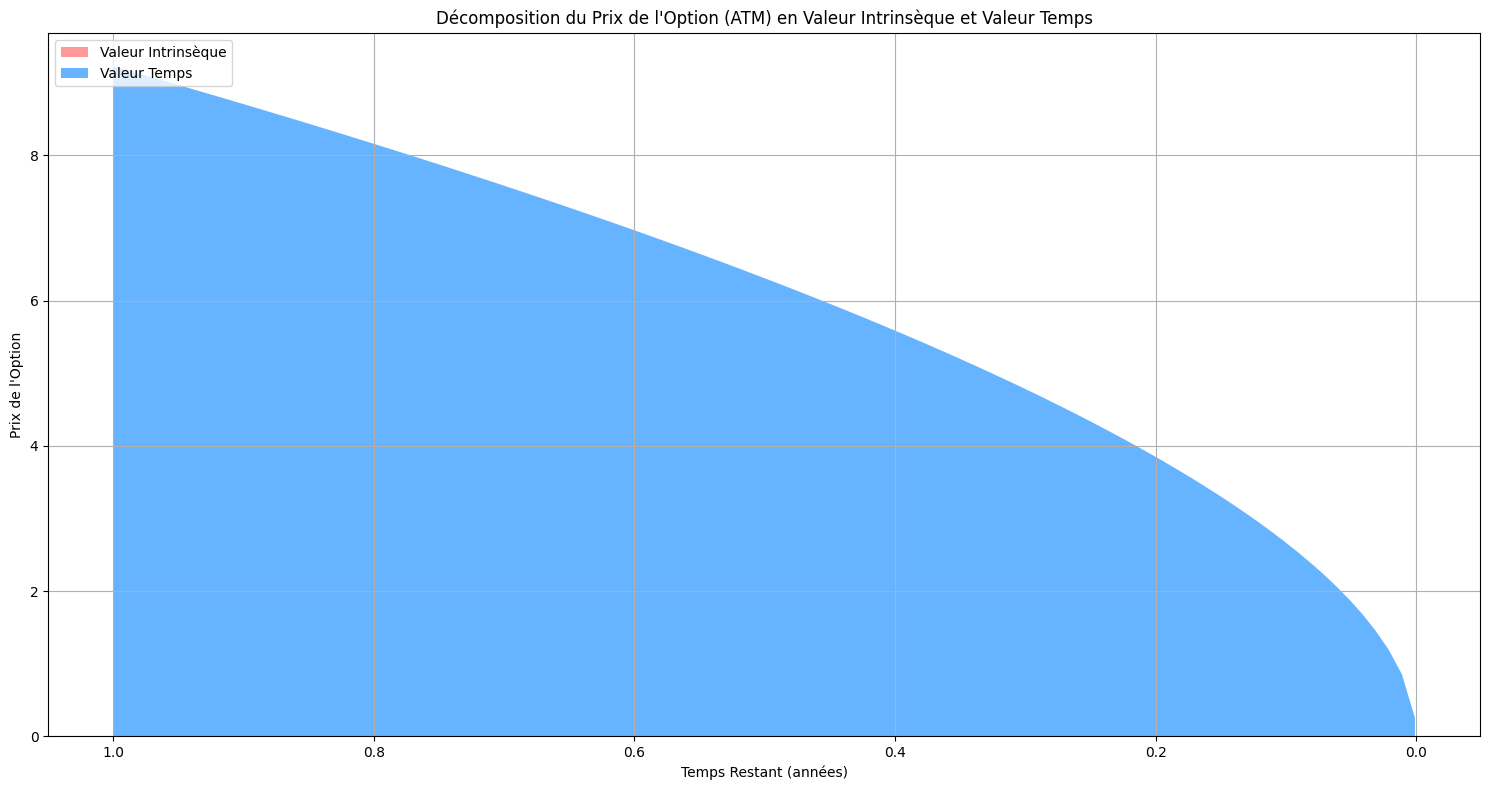

In [32]:
    # Démontrer le comportement de l'option à l'approche de l'échéance
    print("\nDémonstration du comportement de l'option à l'approche de l'échéance...")
    sim.plot_time_decay()


Analyse de sensibilité sur le prix initial (S0):
Analyse de sensibilité pour S0 avec 15 valeurs
  Valeur 1/15: S0 = 80.0
  Valeur 2/15: S0 = 82.85714285714286
  Valeur 3/15: S0 = 85.71428571428571
  Valeur 4/15: S0 = 88.57142857142857
  Valeur 5/15: S0 = 91.42857142857143
  Valeur 6/15: S0 = 94.28571428571429
  Valeur 7/15: S0 = 97.14285714285714
  Valeur 8/15: S0 = 100.0
  Valeur 9/15: S0 = 102.85714285714286
  Valeur 10/15: S0 = 105.71428571428572
  Valeur 11/15: S0 = 108.57142857142857
  Valeur 12/15: S0 = 111.42857142857143
  Valeur 13/15: S0 = 114.28571428571428
  Valeur 14/15: S0 = 117.14285714285714
  Valeur 15/15: S0 = 120.0


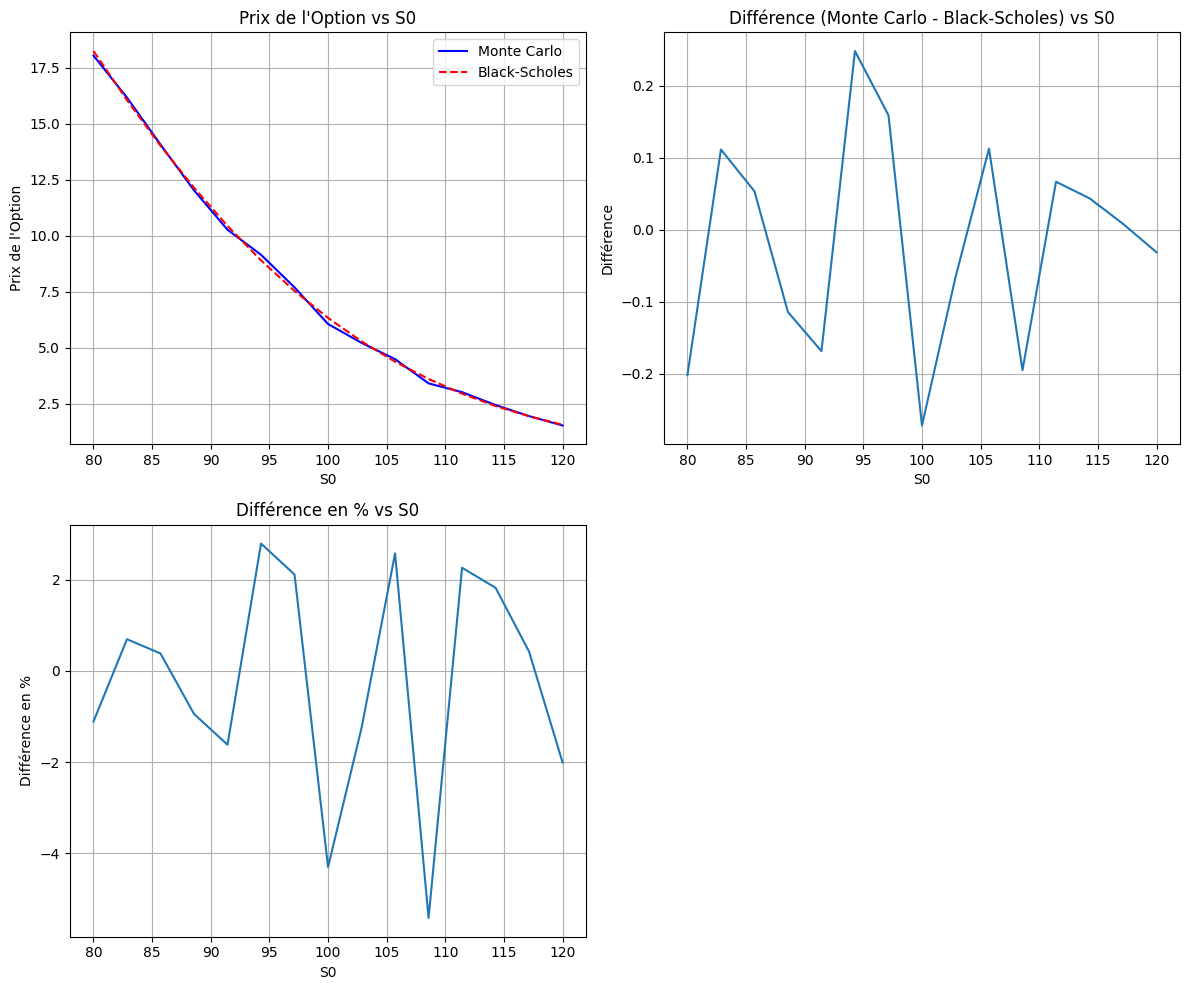

In [33]:
# Analyse de sensibilité sur le prix initial
print("\nAnalyse de sensibilité sur le prix initial (S0):")
s0_values = np.linspace(80, 120, 15)
s0_sensitivity = sim.run_sensitivity_analysis('S0', s0_values, num_simulations=5000)


Analyse de sensibilité sur la volatilité (sigma):
Analyse de sensibilité pour sigma avec 15 valeurs
  Valeur 1/15: sigma = 0.1
  Valeur 2/15: sigma = 0.1285714285714286
  Valeur 3/15: sigma = 0.15714285714285714
  Valeur 4/15: sigma = 0.18571428571428572
  Valeur 5/15: sigma = 0.2142857142857143
  Valeur 6/15: sigma = 0.24285714285714288
  Valeur 7/15: sigma = 0.27142857142857146
  Valeur 8/15: sigma = 0.30000000000000004
  Valeur 9/15: sigma = 0.3285714285714286
  Valeur 10/15: sigma = 0.3571428571428572
  Valeur 11/15: sigma = 0.3857142857142858
  Valeur 12/15: sigma = 0.41428571428571437
  Valeur 13/15: sigma = 0.44285714285714284
  Valeur 14/15: sigma = 0.4714285714285714
  Valeur 15/15: sigma = 0.5


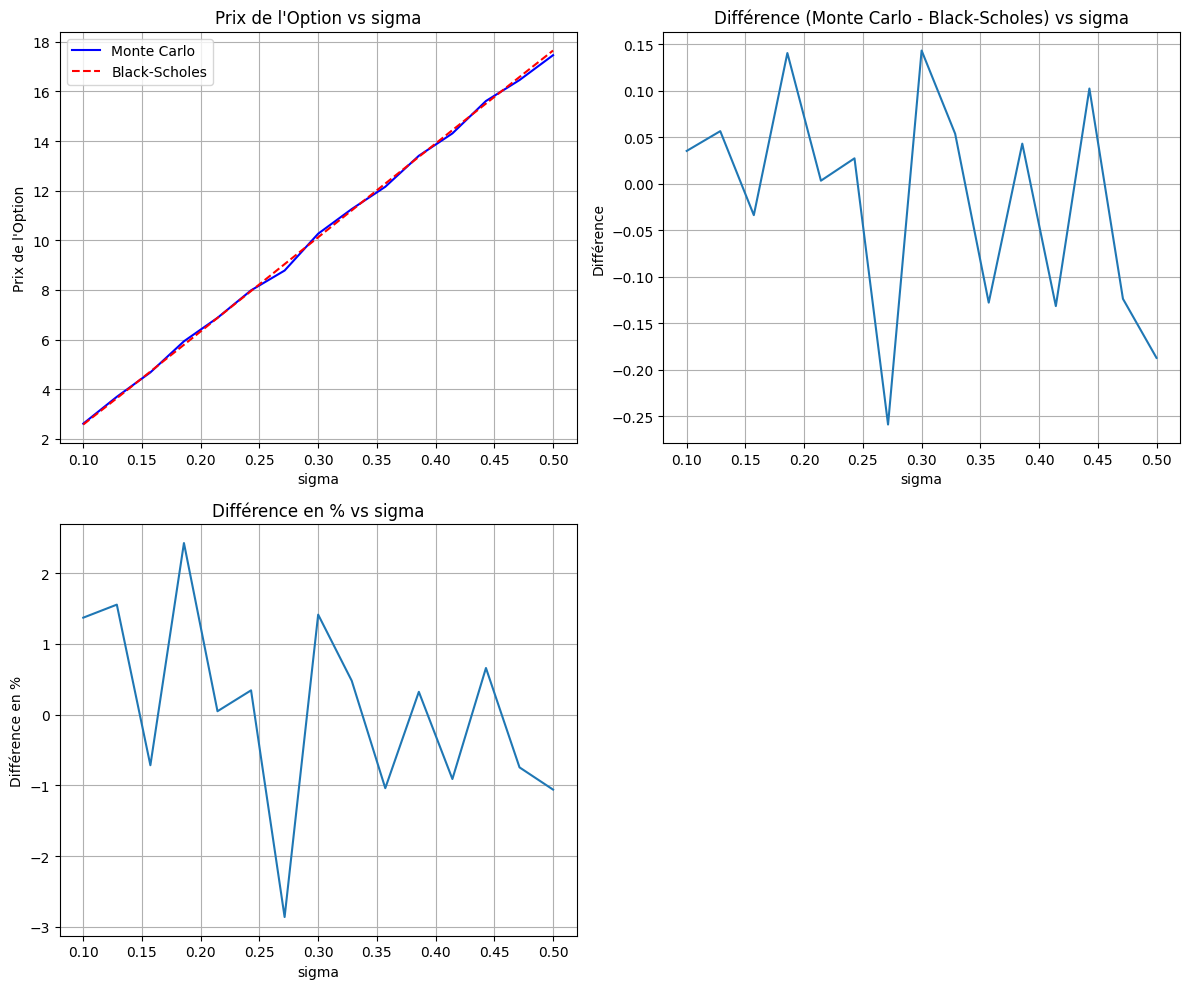

In [34]:
# Analyse de sensibilité sur la volatilité
print("\nAnalyse de sensibilité sur la volatilité (sigma):")
sigma_values = np.linspace(0.1, 0.5, 15)
sigma_sensitivity = sim.run_sensitivity_analysis('sigma', sigma_values, num_simulations=5000)



Analyse de la convergence:
Analyse de convergence:
  Point 1/20: 100 simulations
  Point 2/20: 1147 simulations
  Point 3/20: 2194 simulations
  Point 4/20: 3242 simulations
  Point 5/20: 4289 simulations
  Point 6/20: 5336 simulations
  Point 7/20: 6384 simulations
  Point 8/20: 7431 simulations
  Point 9/20: 8478 simulations
  Point 10/20: 9526 simulations
  Point 11/20: 10573 simulations
  Point 12/20: 11621 simulations
  Point 13/20: 12668 simulations
  Point 14/20: 13715 simulations
  Point 15/20: 14763 simulations
  Point 16/20: 15810 simulations
  Point 17/20: 16857 simulations
  Point 18/20: 17905 simulations
  Point 19/20: 18952 simulations
  Point 20/20: 20000 simulations


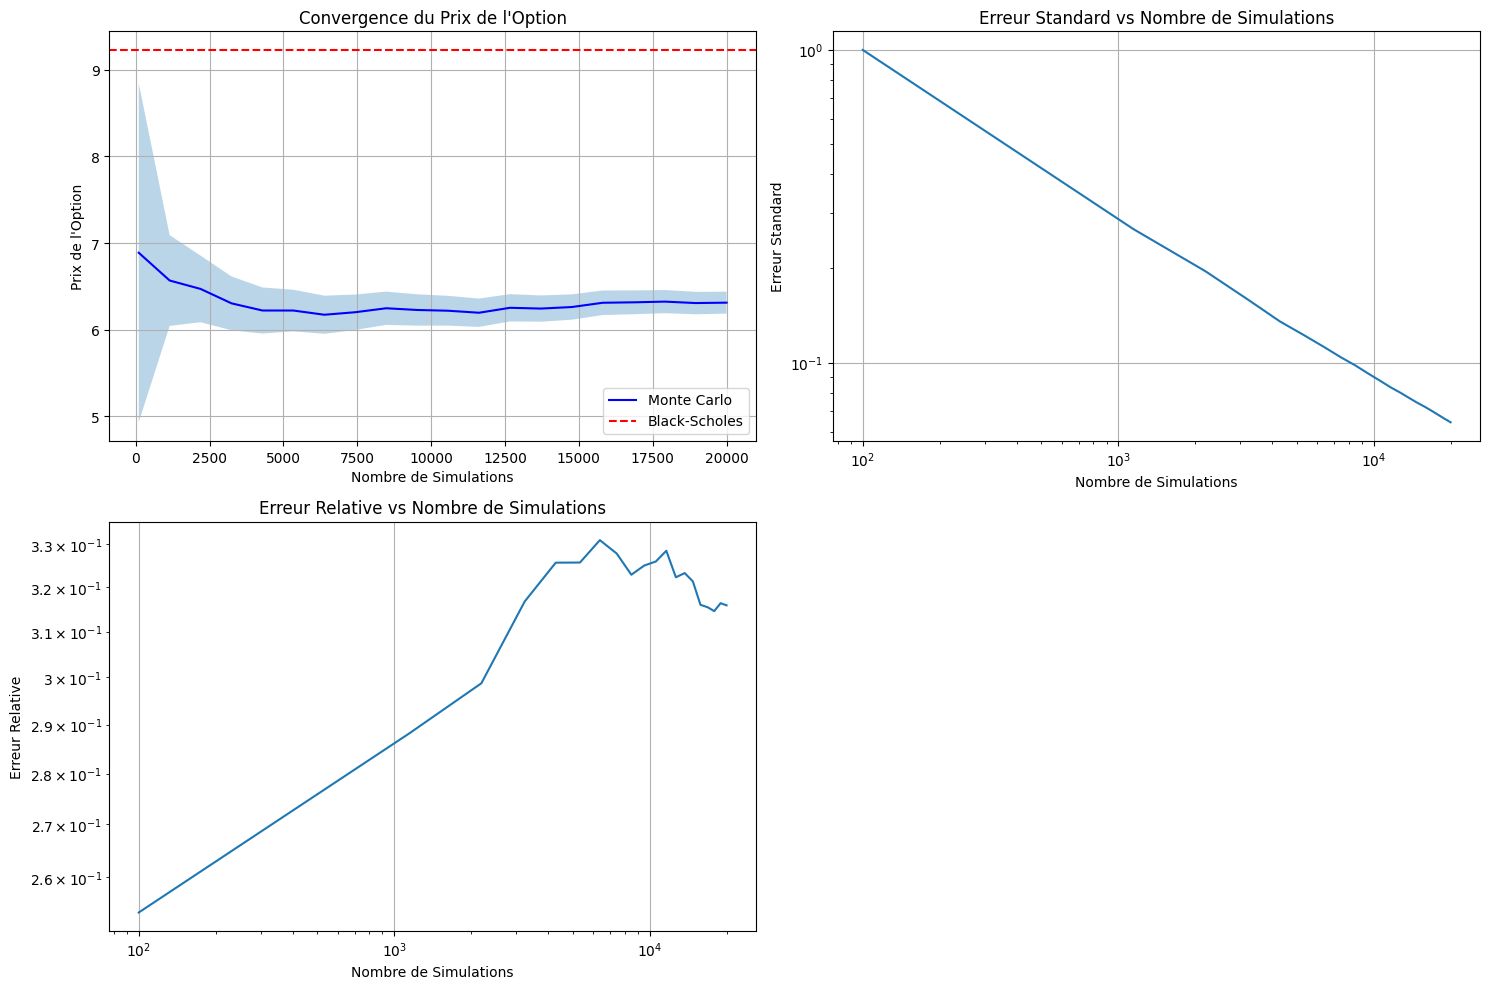

   num_simulations  monte_carlo_price  bs_price  standard_error  ci_95_lower  \
0              100           6.888162  9.227006        0.997829     4.932418   
1             1147           6.567722  9.227006        0.267111     6.044185   
2             2194           6.470653  9.227006        0.195961     6.086570   
3             3242           6.304365  9.227006        0.158432     5.993838   
4             4289           6.221850  9.227006        0.135537     5.956198   

   ci_95_upper  relative_error  
0     8.843907        0.253478  
1     7.091258        0.288207  
2     6.854737        0.298727  
3     6.614892        0.316749  
4     6.487503        0.325691  


In [35]:
# Analyse de la convergence
print("\nAnalyse de la convergence:")
convergence = sim.plot_convergence(max_simulations=20000, num_points=20)
# Examiner les résultats détaillés si nécessaire
print(convergence.head())